In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Big-Mart-Sales-Prediction/main/train_v9rqX0R.csv")
test = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Big-Mart-Sales-Prediction/main/test_AbJTz2l.csv")
submission = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Big-Mart-Sales-Prediction/main/sample_submission_8RXa3c6.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.shape

(8523, 12)

In [6]:
#test data set will not have the outlet sales
test.shape

(5681, 11)

In [7]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [8]:
train["data"] = "train"
test["data"] = "test"

In [9]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [10]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,data
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [11]:
train.shape, test.shape

((8523, 13), (5681, 12))

In [12]:
data = pd.concat([train,test])

In [13]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [14]:
data.shape

(14204, 13)

In [15]:
data = data.reset_index().drop(columns="index")

In [16]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [19]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [20]:
#Scaling
numerical_columns = data.select_dtypes(include=np.number).drop(columns=['Outlet_Establishment_Year','Item_Outlet_Sales']).columns

In [21]:
category_columns = data.select_dtypes(exclude=np.number).columns

In [22]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [23]:
category_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'data'],
      dtype='object')

In [24]:
data[category_columns].apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
data                       2
dtype: int64

In [25]:
data[category_columns].apply(lambda x: print(x.value_counts()))

FDZ47    10
FDJ58    10
FDK08    10
FDF28    10
FDR46    10
         ..
NCW54     7
FDO33     7
NCL42     7
DRN11     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
data                    None
dtype: object

In [26]:
data[numerical_columns].isna().sum()

Item_Weight        2439
Item_Visibility       0
Item_MRP              0
dtype: int64

In [27]:
data[category_columns].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
data                       0
dtype: int64

In [28]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train


In [29]:
train.groupby(["Item_Visibility","Item_Type"]).Item_Outlet_Sales.mean()[0.000000]

Item_Type
Baking Goods             1598.334276
Breads                   2612.090059
Breakfast                1828.064867
Canned                   2257.667273
Dairy                    2220.057537
Frozen Foods             2152.870827
Fruits and Vegetables    2570.240545
Hard Drinks              2127.152671
Health and Hygiene       2117.022067
Household                2066.003510
Meat                     2027.760480
Others                   2065.245020
Seafood                  2662.034850
Snack Foods              2268.321853
Soft Drinks              2079.450059
Starchy Foods            3118.518427
Name: Item_Outlet_Sales, dtype: float64

In [30]:
train.groupby(["Item_Visibility","Item_Type"]).Item_Outlet_Sales.mean()

Item_Visibility  Item_Type            
0.000000         Baking Goods             1598.334276
                 Breads                   2612.090059
                 Breakfast                1828.064867
                 Canned                   2257.667273
                 Dairy                    2220.057537
                                             ...     
0.309390         Household                 138.486400
0.311090         Baking Goods              154.465600
0.321115         Fruits and Vegetables     199.740000
0.325781         Household                 761.009400
0.328391         Canned                    588.567200
Name: Item_Outlet_Sales, Length: 8006, dtype: float64

In [31]:
data.groupby("Outlet_Identifier").Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
OUT013    2.142664e+06
OUT046    2.118395e+06
OUT045    2.036725e+06
OUT018    1.851823e+06
OUT010    1.883402e+05
OUT019    1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [32]:
data.groupby("Item_Identifier").Item_Outlet_Sales.sum().sort_values(ascending=False)

Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
            ...    
FDQ04      784.3124
FDF38      771.6622
FDY43      673.7896
NCR42      332.9000
FDQ60      120.5098
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [33]:
data[data["Outlet_Identifier"]=="OUT027"].groupby("Item_Identifier").Item_Outlet_Sales.sum().sort_values(ascending=False).head(20)

Item_Identifier
NCE42    13086.9648
FDQ19    12117.5600
FDZ20    11445.1020
FDP33    10993.6896
FDI50    10306.5840
FDU14    10236.6750
NCH18    10072.8882
FDC17     9678.0688
FDG32     9562.2196
DRF36     9554.2300
FDY02     9467.6760
FDO03     9390.4432
FDU55     9371.8008
FDN58     9267.9360
FDY55     9251.9568
FDP15     9227.9880
FDS26     9158.0790
FDS44     9133.4444
FDR35     8958.3390
FDH10     8912.3988
Name: Item_Outlet_Sales, dtype: float64

In [34]:
#Exploratory Data Analysis

<AxesSubplot:xlabel='Outlet_Identifier'>

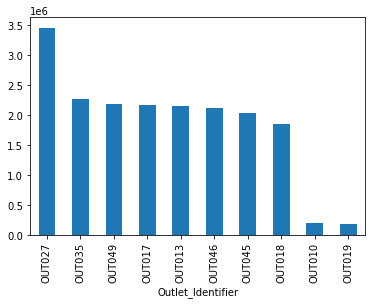

In [35]:
data.groupby("Outlet_Identifier").Item_Outlet_Sales.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Identifier'>

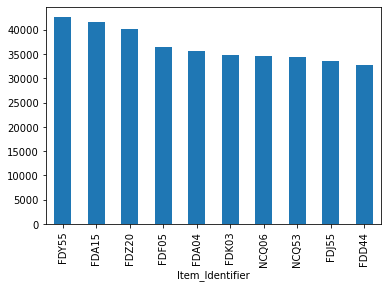

In [36]:
data.groupby("Item_Identifier").Item_Outlet_Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

<AxesSubplot:xlabel='Outlet_Type'>

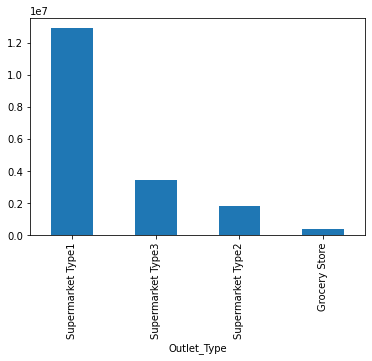

In [37]:
data.groupby("Outlet_Type").Item_Outlet_Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Type'>

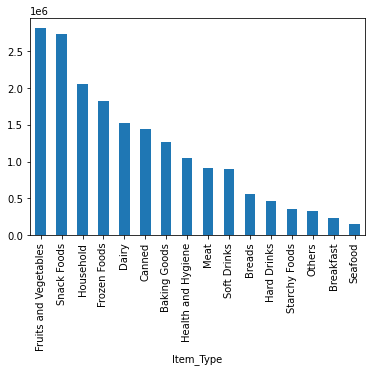

In [38]:
data.groupby("Item_Type").Item_Outlet_Sales.sum().sort_values(ascending=False).head(16).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Type'>

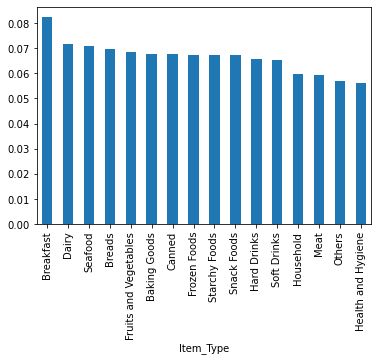

In [39]:
data.groupby("Item_Type").Item_Visibility.mean().sort_values(ascending = False).plot(kind = "bar")

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

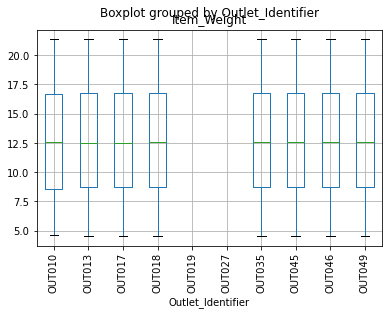

In [40]:
data.boxplot(column = "Item_Weight", by = "Outlet_Identifier", rot = 90)

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Outlet_Type'>

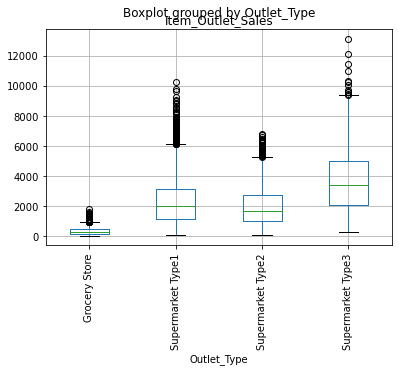

In [41]:
data.boxplot(column = "Item_Outlet_Sales", by = "Outlet_Type", rot = 90)

<AxesSubplot:title={'center':'Item_Visibility'}, xlabel='Outlet_Type'>

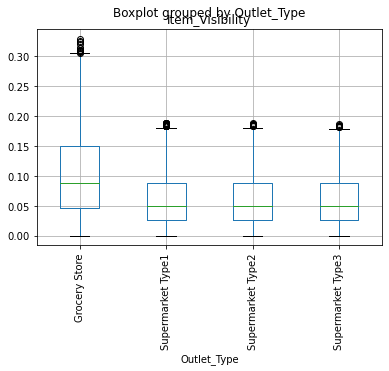

In [42]:
data.boxplot(column = "Item_Visibility", by = "Outlet_Type", rot = 90)

In [43]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [44]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

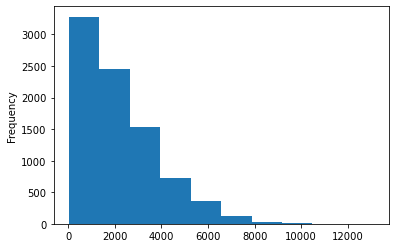

In [45]:
train["Item_Outlet_Sales"].plot(kind = "hist")

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

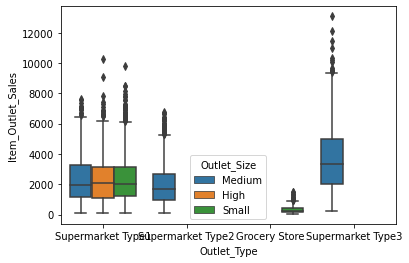

In [46]:
sns.boxplot(data = train, x = "Outlet_Type", y = "Item_Outlet_Sales", hue = "Outlet_Size")

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

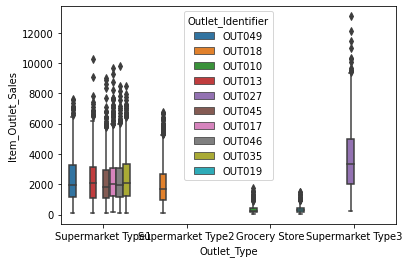

In [47]:
sns.boxplot(data = train, x = "Outlet_Type", y = "Item_Outlet_Sales", hue = "Outlet_Identifier")

In [48]:
data[data["Outlet_Identifier"]=="OUT027"].Outlet_Establishment_Year.unique()


array([1985], dtype=int64)

In [49]:
data["Item_Identifier_group"] = data["Item_Identifier"].apply(lambda x : x[0:2])

In [50]:
data.groupby("Item_Identifier_group").Item_Type.value_counts()

Item_Identifier_group  Item_Type            
DR                     Soft Drinks               726
                       Hard Drinks               362
                       Dairy                     229
FD                     Fruits and Vegetables    2013
                       Snack Foods              1989
                       Frozen Foods             1426
                       Baking Goods             1086
                       Canned                   1084
                       Dairy                     907
                       Meat                      736
                       Breads                    416
                       Starchy Foods             269
                       Breakfast                 186
                       Seafood                    89
NC                     Household                1548
                       Health and Hygiene        858
                       Others                    280
Name: Item_Type, dtype: int64

In [51]:
#Data Preprocessing

In [52]:
#Check for duplicates
data[data.duplicated()].sum()

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
data                         0.0
Item_Identifier_group        0.0
dtype: float64

In [53]:
#Item_Fat_Content replace
data["Item_Fat_Content"].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [54]:
data["Item_Fat_Content"].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg': 'Regular' }, inplace = True)

In [55]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [56]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [57]:
#Replacing the nulls
data["Item_Weight"]

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [58]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data', 'Item_Identifier_group'],
      dtype='object')

In [59]:
data.pivot_table(values="Item_Weight", index = "Item_Identifier").loc['FDP10']

Item_Weight    19.0
Name: FDP10, dtype: float64

In [60]:
data[data["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Item_Identifier_group
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,FD
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train,DR
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train,FD
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train,FD
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train,FD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,FD
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,FD
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,DR
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,DR


In [61]:
data["Item_Weight"] = data.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [62]:
data[data["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Item_Identifier_group


In [63]:
data[data["Item_Identifier"] == "FDN52"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Item_Identifier_group
927,FDN52,9.395,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,train,FD
8919,FDN52,9.395,Regular,0.131774,Frozen Foods,87.7198,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test,FD
10070,FDN52,9.395,Regular,0.220221,Frozen Foods,88.1198,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test,FD
11486,FDN52,9.395,Regular,0.132314,Frozen Foods,88.5198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,FD
11593,FDN52,9.395,Regular,0.131460,Frozen Foods,85.2198,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test,FD
11694,FDN52,9.395,Regular,0.131570,Frozen Foods,88.1198,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,FD
12102,FDN52,9.395,Regular,0.131545,Frozen Foods,87.3198,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN,test,FD
12775,FDN52,9.395,Regular,0.132106,Frozen Foods,85.3198,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,FD
13794,FDN52,9.395,Regular,0.131837,Frozen Foods,85.2198,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test,FD


In [64]:
data.loc[7]

Item_Identifier                          FDP10
Item_Weight                                 19
Item_Fat_Content                       Low Fat
Item_Visibility                        0.12747
Item_Type                          Snack Foods
Item_MRP                               107.762
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                      4022.76
data                                     train
Item_Identifier_group                       FD
Name: 7, dtype: object

In [65]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
Item_Identifier_group           0
dtype: int64

In [66]:
data["Outlet_Size"].isna().sum()

4016

In [67]:
from scipy.stats import mode
data.pivot_table(values="Outlet_Size", index = "Outlet_Identifier", aggfunc=(lambda x: mode(x).mode[0]))

,Outlet_Size
Outlet_Identifier,
OUT010,0
OUT013,High
OUT017,0
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,0
OUT046,Small


In [68]:
data["Outlet_Size"] = data["Outlet_Size"].fillna("unknown")

In [69]:
data.pivot_table(values="Outlet_Size", index = "Outlet_Type", aggfunc=(lambda x: mode(x).mode[0]))

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [70]:
data["Outlet_Size"] = data["Outlet_Size"].replace({"unknown":"Very Small"})

In [71]:
data.pivot_table(values="Outlet_Size", index = "Outlet_Identifier", aggfunc=(lambda x: mode(x).mode[0]))

,Outlet_Size
Outlet_Identifier,
OUT010,Very Small
OUT013,High
OUT017,Very Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Very Small
OUT046,Small


In [72]:
data["Item_Visibility"].isna().sum()

0

In [73]:
data["Item_Visibility"] = data["Item_Visibility"].replace({0:np.NAN})

In [74]:
data.pivot_table(values="Item_Visibility", index = "Item_Type", columns = "Outlet_Type")

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [75]:
truth_table_item_outlet_type_visibility = data.pivot_table(values="Item_Visibility", index = "Item_Type", columns = "Outlet_Type")

In [76]:
truth_table_item_outlet_type_visibility

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [77]:
test = data[data["Item_Visibility"].isna()].head(1)

In [78]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Item_Identifier_group
3,FDX07,19.2,Regular,NaN,Fruits and Vegetables,182.095,OUT010,1998,Very Small,Tier 3,Grocery Store,732.38,train,FD


In [79]:
def find_visibility(x):
    return truth_table_item_outlet_type_visibility.loc[x["Item_Type"], x["Outlet_Type"]]

In [80]:
find_visibility(test)

Outlet_Type,Grocery Store
Item_Type,
Fruits and Vegetables,0.11482


In [81]:
data[data["Item_Visibility"].isnull()].apply(find_visibility, axis= 1)

3        0.114820
4        0.057774
5        0.068206
10       0.067123
32       0.065584
           ...   
14166    0.114820
14171    0.067549
14177    0.065578
14184    0.065485
14202    0.066167
Length: 879, dtype: float64

In [82]:
data["Item_Visibility"].fillna(data[data["Item_Visibility"].isnull()].apply(find_visibility, axis= 1), inplace = True)

In [83]:
data["Item_Visibility"].isna().sum()

0

In [84]:
#Feature Engineering
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data', 'Item_Identifier_group'],
      dtype='object')

In [85]:
data["Outlet_Age"] = 2021 - data["Outlet_Establishment_Year"]

In [86]:
del data["Outlet_Establishment_Year"]

In [87]:
#Data Preparation

In [88]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Item_Identifier_group,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,22
3,FDX07,19.20,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,Very Small,Tier 3,Grocery Store,732.3800,train,FD,23
4,NCD19,8.93,Low Fat,0.057774,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,NC,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,NaN,test,FD,24
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,NaN,test,FD,12
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Very Small,Tier 2,Supermarket Type1,NaN,test,NC,19
14202,FDJ26,15.30,Regular,0.066167,Canned,214.6218,OUT017,Very Small,Tier 2,Supermarket Type1,NaN,test,FD,14


In [89]:
data.select_dtypes(include = np.number).corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.021476,0.035751,0.013261,-0.000247
Item_Visibility,-0.021476,1.000000,-0.008985,-0.140762,0.093420
Item_MRP,0.035751,-0.008985,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.013261,-0.140762,0.567574,1.000000,0.049135
Outlet_Age,-0.000247,0.093420,-0.000141,0.049135,1.000000


<AxesSubplot:>

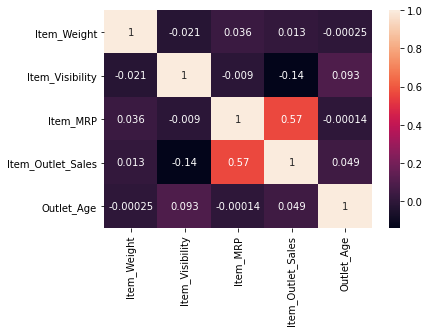

In [90]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

In [91]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Item_Outlet_Sales").columns

In [92]:
data.select_dtypes(exclude = np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,data,Item_Identifier_group
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,DR
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,FD
3,FDX07,Regular,Fruits and Vegetables,OUT010,Very Small,Tier 3,Grocery Store,train,FD
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train,NC
...,...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test,FD
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test,FD
14201,NCO17,Low Fat,Health and Hygiene,OUT045,Very Small,Tier 2,Supermarket Type1,test,NC
14202,FDJ26,Regular,Canned,OUT017,Very Small,Tier 2,Supermarket Type1,test,FD


In [93]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Item_Identifier","data"]).columns

In [94]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [95]:
scaler = StandardScaler()

In [96]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [97]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Item_Identifier","Outlet_Identifier","data", "Item_Outlet_Sales"]]], axis = 1)

In [98]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [99]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [100]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Item_Outlet_Sales"])

In [101]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [102]:
train_preprocessed.to_csv("train_preprocessed.csv")
test_preprocessed.to_csv("test_preprocessed.csv")

In [103]:
train_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_group_DR,Item_Identifier_group_FD,Item_Identifier_group_NC,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,-0.751014,-1.112295,1.752511,-0.139681,FDA15,OUT049,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,-1.477653,-1.046017,-1.493696,-1.334228,DRC01,OUT018,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1.011839,-1.097673,0.009874,-0.139681,FDN15,OUT049,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1.377308,0.913882,0.661838,-0.020226,FDX07,OUT010,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.830557,-0.256345,-1.403623,1.293777,NCD19,OUT013,994.7052


In [104]:
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Item_Identifier_group_DR,Item_Identifier_group_FD,Item_Identifier_group_NC,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier
8523,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1.710530,-1.286299,-0.533831,-0.139681,FDW58,OUT049
8524,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,-0.965996,-0.653196,-0.864708,-1.095319,FDW14,OUT017
8525,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.388391,0.601144,1.622763,-0.020226,NCN55,OUT010
8526,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-1.177753,-1.125811,0.225966,-1.095319,FDQ58,OUT017
8527,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0.173409,0.991400,1.501577,1.532686,FDY38,OUT027


In [105]:
#Model
model = LinearRegression()

In [106]:
X = train_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])

In [107]:
y = train_preprocessed["Item_Outlet_Sales"]

In [108]:
model.fit(X,y)

LinearRegression()

In [109]:
mean_squared_error(y, model.predict(X),squared=False)

1127.1096248890942

In [110]:
X_test = test_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [111]:
y_pred = model.predict(X_test)

In [112]:
submission["Item_Outlet_Sales"] = y_pred

In [113]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1831.75
1,FDW14,OUT017,1513.50
2,NCN55,OUT010,1884.25
3,FDQ58,OUT017,2561.50
4,FDY38,OUT027,5134.00
...,...,...,...
5676,FDB58,OUT046,2293.50
5677,FDD47,OUT018,2460.75
5678,NCO17,OUT045,1819.00
5679,FDJ26,OUT017,3565.25


In [114]:
submission['Item_Outlet_Sales'] = np.abs(submission['Item_Outlet_Sales'])

In [115]:
submission.to_csv("linear_regression_result.csv", index = False)

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
poly = PolynomialFeatures(degree = 10)

In [118]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

<AxesSubplot:>

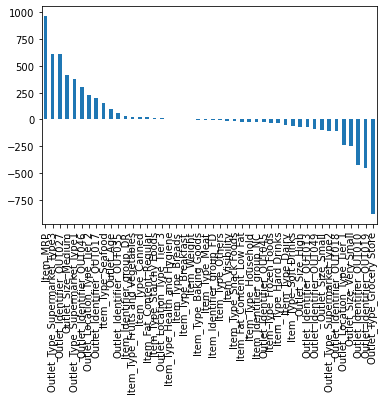

In [119]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X,y)

X.columns

ridge_model.coef_

X.columns.values

modelSlope = pd.Series(ridge_model.coef_, index=X.columns).sort_values(ascending=False)

modelSlope.plot(kind = "bar")



C:\Users\Akshaiya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117789485.79724312, tolerance: 2481726.5077894614
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:>

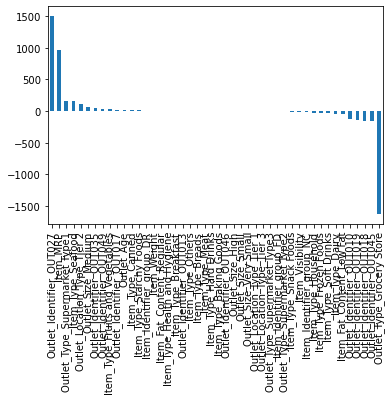

In [120]:
# Lasso Regression

lasso_model = Lasso(alpha = 0.2)

lasso_model.fit(X,y)

X.columns

lasso_model.coef_

X.columns.values

modelSlope = pd.Series(lasso_model.coef_, index=X.columns).sort_values(ascending=False)

modelSlope.plot(kind = "bar")


Item_Type_Dairy         -0.0
Item_Type_Breads         0.0
Item_Type_Breakfast     -0.0
Item_Type_Hard Drinks    0.0
dtype: float64

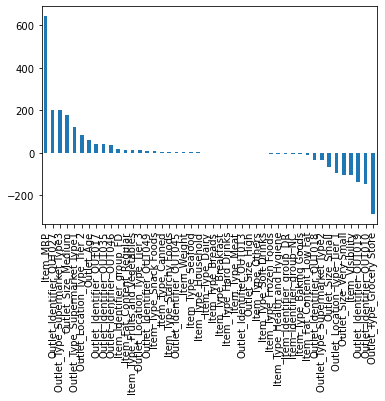

In [121]:
elastic_model = ElasticNet()

elastic_model.fit(X,y)

X.columns

elastic_model.coef_

X.columns.values

modelSlope = pd.Series(elastic_model.coef_, index=X.columns).sort_values(ascending=False)

modelSlope.plot(kind = "bar")

modelSlope[modelSlope==0]